In [2]:
import sys, nevis, numpy as np, pandas as pd
sys.path.insert(0, "../src/")
from framework import *
from algorithms import mlsl
save_handler = SaveHandlerJSON('../result/june/')
mlsl.load_best_instance('../result/june.db')
ins = mlsl.best_instance
ins.load_results(partial=False, save_handler=save_handler)

In [7]:
ins.results

[{'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 122, 'result_index': 0, 'ret_point': [216924.9639392323, 771375.1441887103], 'ret_height': 1330.6838277877582, 'message': '', 'is_success': False, 'eval_num': 50000, 'len_points': 50000, 'gary_score': 7, 'info': {'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 122, 'result_index': 0}},
 {'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 122, 'result_index': 1, 'ret_point': [299126.82058877504, 799548.9303920462], 'ret_height': 1293.6294733902148, 'message': '', 'is_success': False, 'eval_num': 50000, 'len_points': 50000, 'gary_score': 2, 'info': {'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 122, 'result_index': 1}},
 {'algorithm_name': 'MLSL', 'algorithm_version': 1, 'instance_index': 122, 'result_index': 2, 'ret_point': [298893.0002263587, 798924.6398519339], 'ret_height': 1309.0034735620907, 'message': '', 'is_success': False, 'eval_num': 50000, 'len_poin

In [8]:
def get_result_success_eval(result, f_target):
    max_height = 0
    for i, h in enumerate(result.heights, 1):
        if i > MAX_FES:
            break
        max_height = max(h, max_height)
        if h >= f_target:
            return True, i

    return False, min(MAX_FES, result.len_points)

In [9]:
def ert(instance, f_target):
    success_result_num = 0
    sum_eval_num = 0
    for result in instance.results:
        is_success, eval_num = get_result_success_eval(result, f_target)
        if is_success:
            success_result_num += 1
        sum_eval_num += eval_num
    
    if success_result_num == 0:
        return float('inf')
    else:
        return sum_eval_num / success_result_num


\([-100, 0)\)     & Below sea-level                                         & ---  & \(1.23 \times 10^{5}\) & \(3.37 \times 10^{-4}\) \\
\([0, 600)\)     & Lowland areas                                           & ---  & \(3.58 \times 10^{8}\) & \(9.83 \times 10^{-1}\) \\
\([600, 1000)\)  & Mountainous areas                                       & ---   & \(5.77 \times 10^{6}\) & \(1.58 \times 10^{-2}\) \\
\([1000, 1100)\) & Mountains within top \(\sim\)135 Munros \& 5 Welsh Furths & ---   & \(2.61 \times 10^{5}\) & \(7.18 \times 10^{-4}\) \\
\([1100, 1150)\) & Mountains within top \(\sim\)50 Munros                    & --- & \(6.65 \times 10^{4}\) & \(1.83 \times 10^{-4}\) \\
\([1150, 1215)\) & Mountains within top \(\sim\)25 Munros                    & ---   & \(4.14 \times 10^{4}\) & \(1.14 \times 10^{-4}\) \\
\([1215, 1235)\) & Wider Ben Nevis Massif (within top 9 Munros)                   & 1     & \(4.99 \times 10^{3}\) & \(1.37 \times 10^{-5}\) \\
\([1235, 1297)\) & Cairngorm Plateau (within top 6 Munros)                        & 2    &  \(1.18 \times 10^{4}\) & \(3.24 \times 10^{-5}\) \\
\([1297, 1310)\) & Ben Macdui (2nd highest Munro)                          & 3     & \(1.32 \times 10^{3}\) & \(3.63 \times 10^{-6}\) \\
\([1310, 1340)\) & On Ben Nevis but not quite at the summit                & 7   & \(2.18 \times 10^{3}\) & \(5.99 \times 10^{-6}\) \\
\([1340, 1345)\) & Ben Nevis (highest Munro)                               & 10         & \(8.78 \times 10^{2}\) & \(2.41 \times 10^{-6}\) \\

In [55]:
for f_target in [600, 1000, 1100, 1150, 1215, 1235, 1297, 1310, 1340]:
    print(f_target, ert(ins, f_target))

0 3.227272727272727
600 53.04545454545455
1000 576.8181818181819
1100 1277.5454545454545
1150 2105.5454545454545
1215 4510.590909090909
1235 4737.409090909091
1297 31910.176470588234
1310 164077.33333333334
1340 255423.5


In [66]:
x = [600, 1000, 1100, 1150, 1215, 1235, 1297, 1310, 1340]
y = [ert(ins, f_target) for f_target in x]

In [68]:
y_plot = [np.nan if np.isinf(val) else val for val in y]


Text(0.5, 1.0, 'ERT vs. target height for MLSL instance')

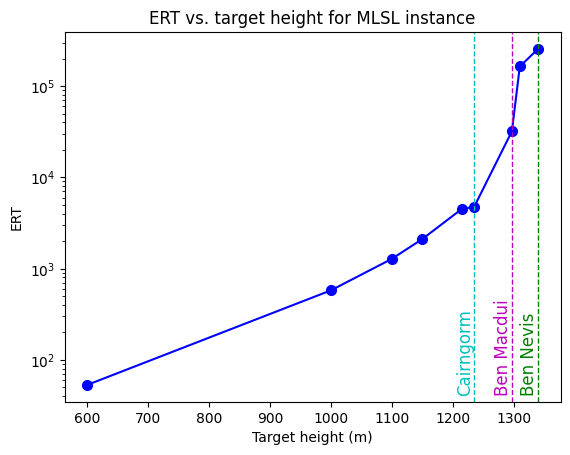

In [83]:
import matplotlib.pyplot as plt

# plt.plot(xs, ys, marker='o', linestyle='-', color='b')
plt.plot(x, y_plot, marker='o', markersize=7, linestyle='-', color='b')

# Adding labels and special markers for inf values
for i in range(len(x)):
    if np.isinf(y[i]):
        # plt.text(x[i] - 20, max(y_plot) * 1.15, 'inf', fontsize=12, ha='right', va='bottom', color='red') 
        # plt.text(x[i], max(y_plot) * 1.1, 'inf', fontsize=12, ha='right', va='bottom')  # Adjust position
        plt.scatter(x[i], max(y_plot) * 1.2, color='r', marker='x', s=100)  # Special marker for inf
    # else:
        # plt.text(x[i], y[i], f'({x[i]}, {y[i]})', fontsize=12, ha='right', va='bottom')
plt.yscale('log') 
plt.axvline(x=1340, color='g', linestyle='--', linewidth=1)
plt.text(1340, plt.ylim()[0] + 6, 'Ben Nevis', fontsize=12, rotation=90, va='bottom', ha='right', color='g')
plt.axvline(x=1297, color='m', linestyle='--', linewidth=1)
plt.text(1297, plt.ylim()[0] + 6, 'Ben Macdui', fontsize=12, rotation=90, va='bottom', ha='right', color='m')
plt.axvline(x=1235, color='c', linestyle='--', linewidth=1)
plt.text(1235, plt.ylim()[0] + 6, 'Cairngorm', fontsize=12, rotation=90, va='bottom', ha='right', color='c')


plt.xlabel('Target height (m)')
plt.ylabel('ERT')
plt.title(f'ERT vs. target height for {ins.algorithm.name} instance')


In [ ]:
def make_ert_plot(instances, colors="rgbcmy"):
    def get_result_success_eval(result, f_target):
        max_height = 0
        for i, h in enumerate(result.heights, 1):
            if i > MAX_FES:
                break
            max_height = max(h, max_height)
            if h >= f_target:
                return True, i

        return False, min(MAX_FES, result.len_points)
    
    def ert(instance, f_target):
        success_result_num = 0
        sum_eval_num = 0
        for result in instance.results:
            is_success, eval_num = get_result_success_eval(result, f_target)
            if is_success:
                success_result_num += 1
            sum_eval_num += eval_num
        
        if success_result_num == 0:
            return np.nan
        else:
            return sum_eval_num / success_result_num
    
    x = [600, 1000, 1100, 1150, 1215, 1235, 1297, 1310, 1340]
    for ins, color in zip(instances, colors):
        y = [ert(ins, f_target) for f_target in x]
        plt.plot(x, y, marker='o', markersize=7, linestyle='-', color=color, label=ins.algorithm.name)
    
    plt.yscale('log') 
    plt.axvline(x=1340, color='g', linestyle='--', linewidth=1)
    plt.text(1340, plt.ylim()[0] + 6, 'Ben Nevis', fontsize=12, rotation=90, va='bottom', ha='right', color='g')
    plt.axvline(x=1297, color='m', linestyle='--', linewidth=1)
    plt.text(1297, plt.ylim()[0] + 6, 'Ben Macdui', fontsize=12, rotation=90, va='bottom', ha='right', color='m')
    plt.axvline(x=1235, color='c', linestyle='--', linewidth=1)
    plt.text(1235, plt.ylim()[0] + 6, 'Cairngorm', fontsize=12, rotation=90, va='bottom', ha='right', color='c')

    plt.legend()

    plt.xlabel('Target height (m)')
    plt.ylabel('ERT')
    plt.title(f'ERT vs. target height for {ins.algorithm.name} instance')

In [11]:
ins.performance_measures()

{'success_rate': 0.18181818181818182,
 'failure_rate': 0.8181818181818181,
 'success_cnt': 4,
 'avg_success_eval': 30423.5,
 'hv': 3559.3636363636365,
 'par2': 87349.72727272728,
 'par10': 414622.45454545453,
 'avg_height': 1313.2921416230035,
 'ert': 255423.49999999994,
 'sp': 167329.25,
 'success_rate_upper': 0.38517021976637866,
 'success_rate_lower': 0.07306766024105121,
 'success_rate_length': 0.31210255952532745,
 'gary_ert': 10532.927835051547}